# Model Evaluation and Refinement

#### Objectives
   - Evaluate and refine prediction models
    
#### Tables of Contents
   - Model Evaluation
   - Over-fitting, Under-fitting and Model Selection
   - Ridge Regression
   - Grid Search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 14 Model Evaluation and Refinement Automobile Pricing\automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Let's use numerical data only

df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


## Functions for plotting

In [4]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 5
    plt.figure(figsize =(width,height))
    
    ax1 = sns.kdeplot(RedFunction, color = 'r', label =  RedName)
    ax2 = sns.kdeplot(BlueFunction, color = 'b', label = BlueName, ax = ax1)
    
    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [5]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    widht = 10
    height = 5
    plt.figure(figsize = (widht, height))
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label ='Training Data')
    plt.plot(xtest, y_test, 'go', label = 'Test Data')
    
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = 'Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing

Split data into training and testing data.

In [6]:
y_data = df['price']
y_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [7]:
# drop price data in datafeame x_data

x_data = df.drop('price', axis = 1)
x_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


In [12]:
# Randomly split data using function train_test_split

from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 1)

print('Number of test sample: ',x_test.shape[0])
print('Number of train sample: ',x_train.shape[0])

Number of test sample:  21
Number of train sample:  180


In [8]:
# import Linear Regression module

from sklearn.linear_model import LinearRegression

In [20]:
lre = LinearRegression()
lre

LinearRegression()

In [21]:
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [22]:
# # Let;s calculate R^2 score on the test data
lre.score(x_test[['horsepower']],y_test)

0.36358755750788263

In [23]:
# calculate R^2 on train data

lre.score(x_train[['horsepower']],y_train)


0.6619724197515104

We can see the R^2 is much smaller using test data compared to the training data

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1"</b>

In [24]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.4, random_state = 0)

print('Number of test sample: ',x_test1.shape[0])
print('Number of train sample: ',x_train1.shape[0])

Number of test sample:  81
Number of train sample:  120


In [25]:
lre.fit(x_train1[['horsepower']],y_train1)


LinearRegression()

In [26]:
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [27]:
lre.score(x_train1[['horsepower']],y_train1)

0.5754067463583004

## Cross Validation Score

Sometimes we do not have sufficient testing data; as a result we may want to perform cross-validation. Let's go over methods that we can use for cross-validaiton.

Let's import cross_val_score from the module model_selection

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
scores = cross_val_score(lre, x_data[['horsepower']],y_data, cv = 4)
scores

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [30]:
print("The mean of folds are ",scores.mean()," and the standard devialtion is ",scores.std())

The mean of folds are  0.522009915042119  and the standard devialtion is  0.29118394447560286


We can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [31]:
from sklearn.model_selection import cross_val_predict

In [32]:
yhat = cross_val_predict(lre, x_data[['horsepower']],y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Part 2: Overfitting, Underfitting and Model Selection

It turns out that the test data, sometimes referred to as the 'out of sample data' is a much better measure of how well our model performs in real world. One reason for this is overfitting.

It turns out these difference are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [34]:
x_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


In [33]:
lr = LinearRegression()
lr

LinearRegression()

In [39]:
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)


LinearRegression()

In [40]:
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [42]:
yhat_test = lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

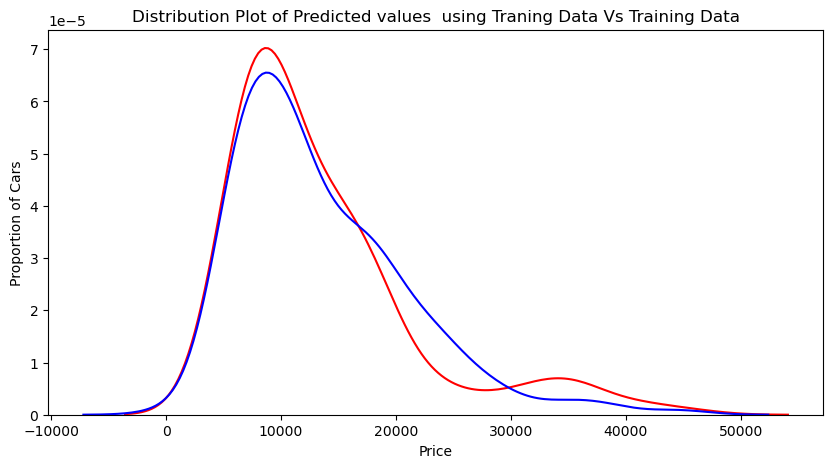

In [43]:
# Let's perform some model evaluaiton using our training and testing data

Title = 'Distribution Plot of Predicted values  using Traning Data Vs Training Data'

DistributionPlot(y_train, yhat_train, "Actual Value(Train)", "Predicted Values(Train)", Title)

So far model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset?

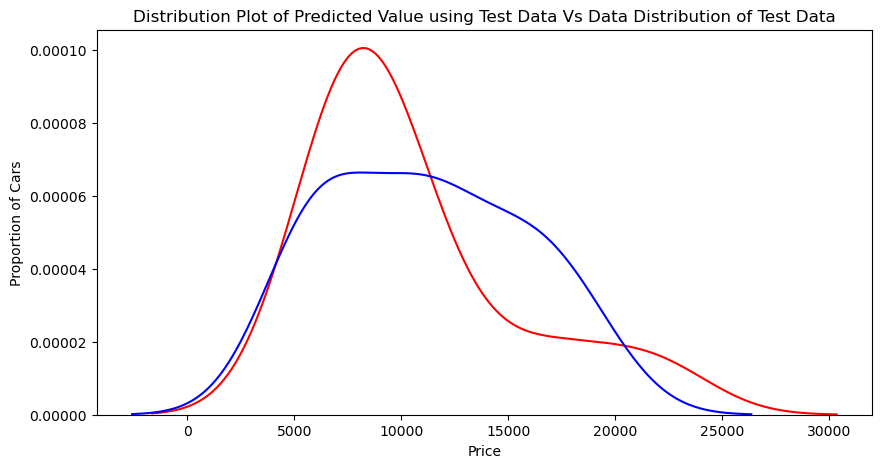

In [44]:
Title = 'Distribution Plot of Predicted Value using Test Data Vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test,"Actual Values(Test)","Predicted Values(Test)",Title)

Comparing fig 1 and fig2, it is evident that the distribution of test data in fig1 is much better at fitting data. This difference in fig2 is apparent in the range of 5000 to 15,000. This is where the shape of the Distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting
<p>
Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model doesnot perform as well since it is modelling noise, not the undelying process that generate the relationship. Let's create a degree 5 polynomial model. </p>

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state =0)

print('Number of test sample: ',x_test.shape[0])
print('Number of train sample: ',x_train.shape[0])

Number of test sample:  91
Number of train sample:  110


In [48]:
# degree 5 polynomial transformation on the feature 'horsepower'

pr = PolynomialFeatures(degree = 5)

x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

pr

PolynomialFeatures(degree=5)

In [49]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [50]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.58615619,  7307.91973653, 12213.73734432, 18893.37966315,
       19996.10669225])

In [51]:
print('The predicted values: ',yhat[0:4])
print('The True vales: ',y_test[0:4].values)

The predicted values:  [ 6728.58615619  7307.91973653 12213.73734432 18893.37966315]
The True vales:  [ 6295. 10698. 13860. 13499.]


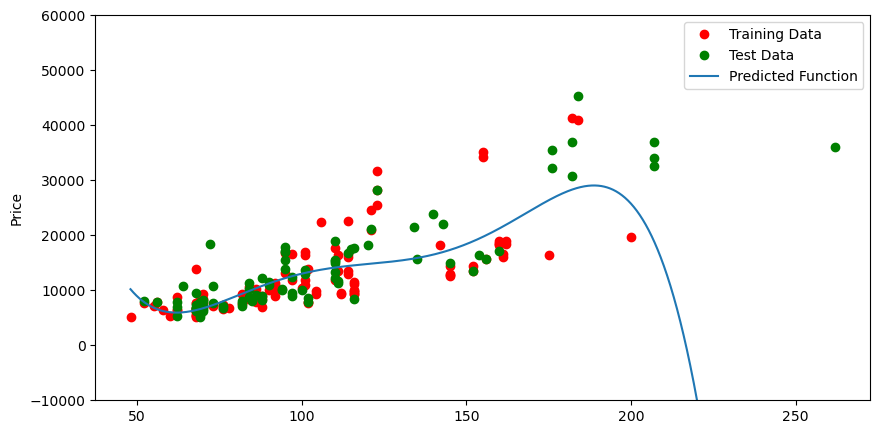

In [54]:
PollyPlot(x_train['horsepower'],x_test['horsepower'], y_train, y_test, poly, pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points

In [55]:
# R^2 of training data

poly.score(x_train_pr, y_train)

0.5567716897727109

In [56]:
poly.score(x_test_pr, y_test)

-29.870994900857237

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for the different order polynomials and then plot the results.

Text(3, 0.75, 'Maximum R^2 ')

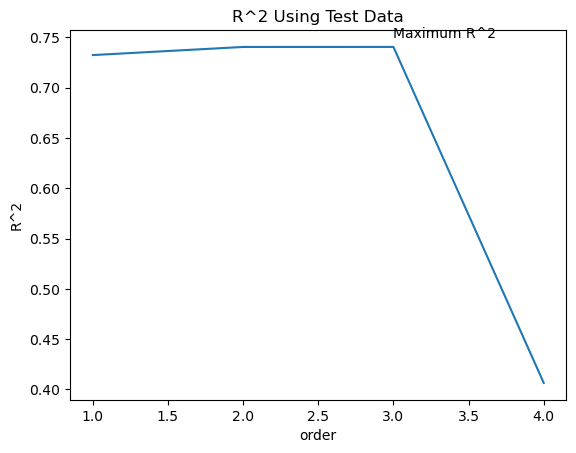

In [57]:
Rsqu_test = []
order = [1,2,3,4]

for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order thee polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

<b>We can perform polynomial transformations with more than one feature. Create a 'PolynomialFeatures' object 'pr1' of degree two.</b>

In [10]:
pr1 = PolynomialFeatures(degree = 2)

In [14]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])


x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [15]:
x_train_pr1.shape

(110, 15)

In [17]:
# Create a linear regression model 'poly1'. Train the object using method 'fit' using Polynomial Features

poly1 = LinearRegression().fit(x_train_pr1, y_train)
poly1

LinearRegression()

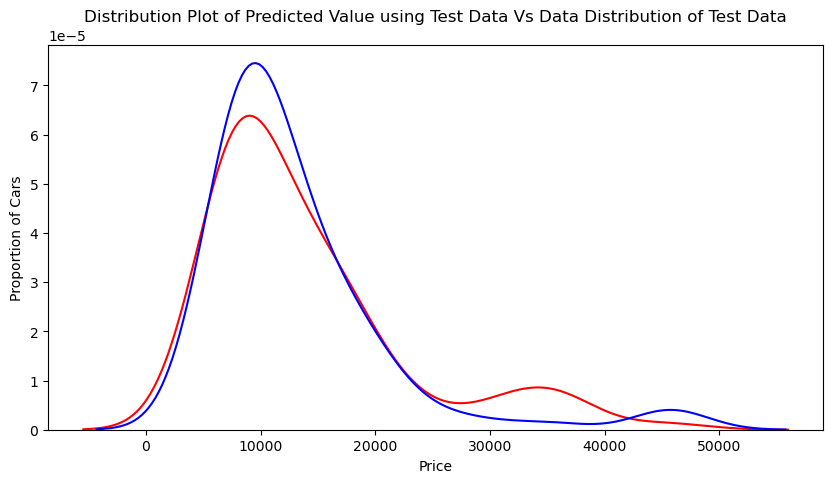

In [19]:
yhat_test_pr1 = poly1.predict(x_test_pr1)

Title = 'Distribution Plot of Predicted Value using Test Data Vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test_pr1,'Actual Value (Test)','Predicted Value(Test)',Title)


The predicted value is higher than actual value for cars where the price  10,000  range, conversely the predicted price is lower than the price cost in the  30,000 to  40,000 range. As such the model is not as accurate in these ranges.

## Ridge Regression

It is the process of regularizing feature set using hyperparameter alpha.

In this section, we will review Ridge Regression and see how the parameter alpha changes the model.

In [27]:
pr = PolynomialFeatures(degree = 2)

x_train_pr = pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])

In [21]:
# Import Ridge From linear model
from sklearn.linear_model import Ridge

In [22]:
RidgeModel = Ridge(alpha = 1)
RidgeModel

Ridge(alpha=1)

In [28]:
RidgeModel.fit(x_train_pr, y_train)
yhat =  RidgeModel.predict(x_test_pr)


print('Predicted value: ',yhat[0:5])
print('Test set: ',y_test[0:5].values)

Predicted value:  [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255
 21397.69847683]
Test set:  [ 6295. 10698. 13860. 13499. 15750.]


## Grid Search

The alpha is hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [32]:
# Let's import GridSearchCV from the module module_selection
from sklearn.model_selection import GridSearchCV

In [30]:
parameters1 = [{'alpha':[0.001, 0.1, 1,10, 100,1000, 10000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [31]:
RR = Ridge()
RR

Ridge()

In [33]:
Grid1 = GridSearchCV(RR, parameters1, cv = 4)

Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [34]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [35]:
BestRR.score(x_test[['horsepower','curb-weight','engine-size','highway-mpg']],y_test)

0.841164983103615